In [ ]:
% pip install pandas matplotlib seaborn networkx


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

france_file_path = "./WorldCupDataset/Teams/France.csv"
france_data = pd.read_csv(france_file_path)

croatia_file_path = "./WorldCupDataset/Teams/Croatia.csv"
croatia_data = pd.read_csv(croatia_file_path)

In [15]:
# Display basic statistics of the dataset
print("Croatia Data:")
print(croatia_data.describe())


Croatia Data:
             caseID        angle       length  height       period  \
count  4.487000e+03  3714.000000  3714.000000     0.0  4487.000000   
mean   4.303828e+06     0.037608    21.604135     NaN     1.715400   
std    3.741638e+06     1.579922    14.573639     NaN     0.804796   
min    7.529400e+04    -3.107124     0.000000     NaN     1.000000   
25%    7.581100e+05    -1.177010    11.401754     NaN     1.000000   
50%    8.658710e+05     0.000000    17.705926     NaN     2.000000   
75%    8.652117e+06     1.292497    27.586230     NaN     2.000000   
max    8.658187e+06     3.141593    91.263350     NaN     5.000000   

            minute     duration      start_X      start_Y        end_X  \
count  4487.000000  4128.000000  4487.000000  4487.000000  3838.000000   
mean     51.330733     1.436934    62.991308    39.194116    68.106826   
std      31.936417     0.900656    28.587348    24.250724    28.528174   
min       0.000000     0.000000     1.000000     1.000000  

In [16]:
# Display basic statistics of the dataset
print("France Data:")
print(france_data.describe())

France Data:
             caseID        angle       length  height       period  \
count  3.770000e+03  3039.000000  3039.000000     0.0  3770.000000   
mean   3.411152e+06     0.038831    20.517281     NaN     1.456499   
std    3.513387e+06     1.552985    14.352324     NaN     0.498170   
min    7.530300e+04    -3.098142     0.000000     NaN     1.000000   
25%    7.563390e+05    -1.152572    10.295630     NaN     1.000000   
50%    8.649940e+05     0.035699    16.278820     NaN     1.000000   
75%    7.546174e+06     1.230661    26.598857     NaN     2.000000   
max    8.658188e+06     3.141593    99.609240     NaN     2.000000   

            minute     duration      start_X      start_Y        end_X  \
count  3770.000000  3382.000000  3770.000000  3770.000000  3121.000000   
mean     43.733952     1.340431    63.572414    41.525729    69.646588   
std      27.146733     0.855562    27.480024    24.941396    26.483662   
min       0.000000     0.000000     2.000000     1.000000   

In [17]:

# Check for missing values
print(france_data.isnull().sum())

caseID                  0
action                  0
type                    0
technique               0
play_pattern            0
under_pressure          0
shot_assist             0
angle                 731
length                731
height               3770
recipient             887
startTime               0
period                  0
minute                  0
duration              388
endTime                 0
possession_team         0
team_action             0
player                  0
player_position         0
body_part             802
start_X                 0
start_Y                 0
end_X                 649
end_Y                 649
bad_behavior            0
result                  0
home_team               0
away_team               0
action_type             0
action_count            0
action_type_count       0
dtype: int64


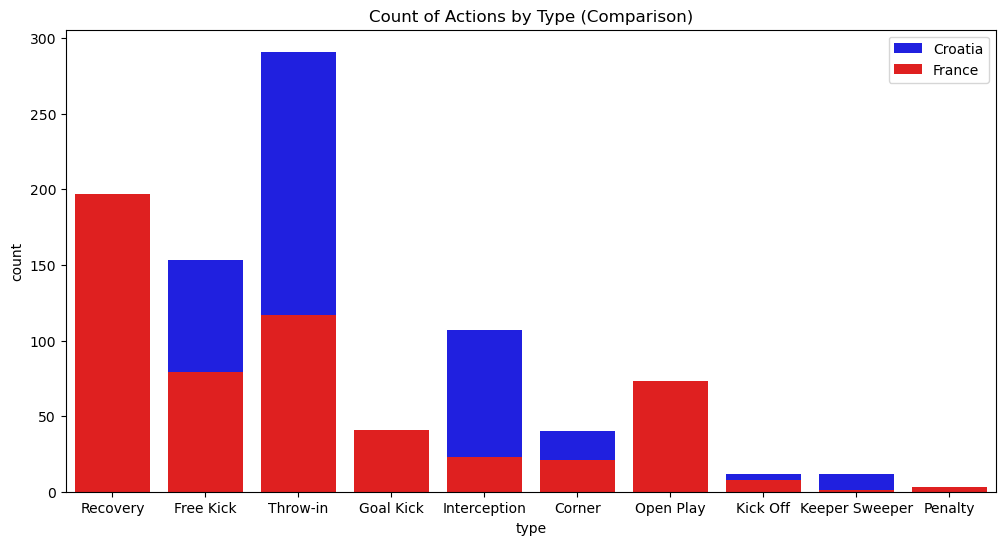

In [27]:
# Count of Actions by Type

plt.figure(figsize=(12, 6))

croatia_data_filtered = croatia_data[croatia_data['type'] != 'None']
france_data_filtered = france_data[france_data['type'] != 'None']

# Plot Croatia data
sns.countplot(x='type', data=croatia_data_filtered, color='blue', label='Croatia')

# Plot France data
sns.countplot(x='type', data=france_data_filtered, color='red', label='France')

plt.title('Count of Actions by Type (Comparison)')
plt.legend()
plt.show()

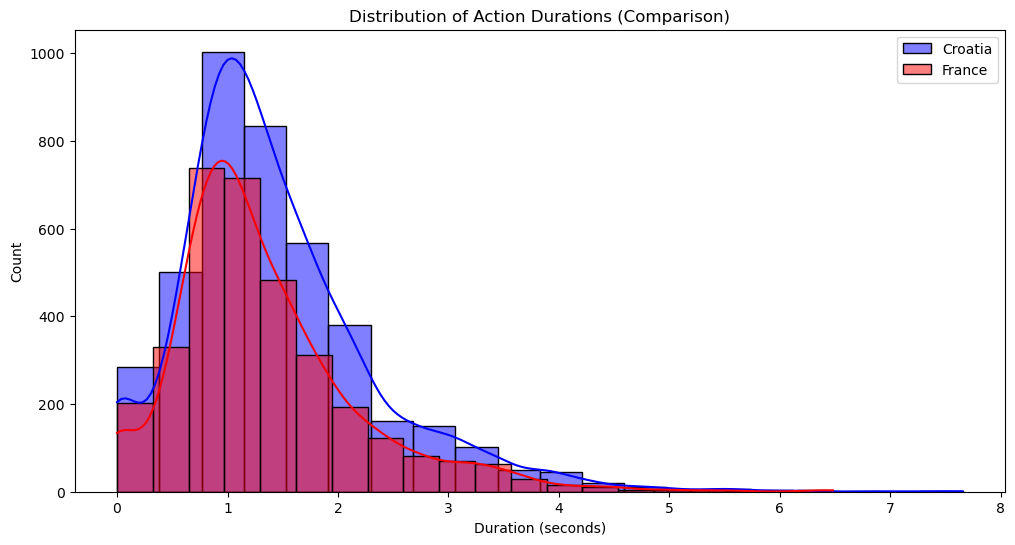

In [19]:
# Distribution of Action Durations
plt.figure(figsize=(12, 6))

# Plot Croatia data
sns.histplot(croatia_data['duration'], bins=20, kde=True, color='blue', label='Croatia')

# Plot France data
sns.histplot(france_data['duration'], bins=20, kde=True, color='red', label='France')

plt.title('Distribution of Action Durations (Comparison)')
plt.xlabel('Duration (seconds)')
plt.legend()
plt.show()

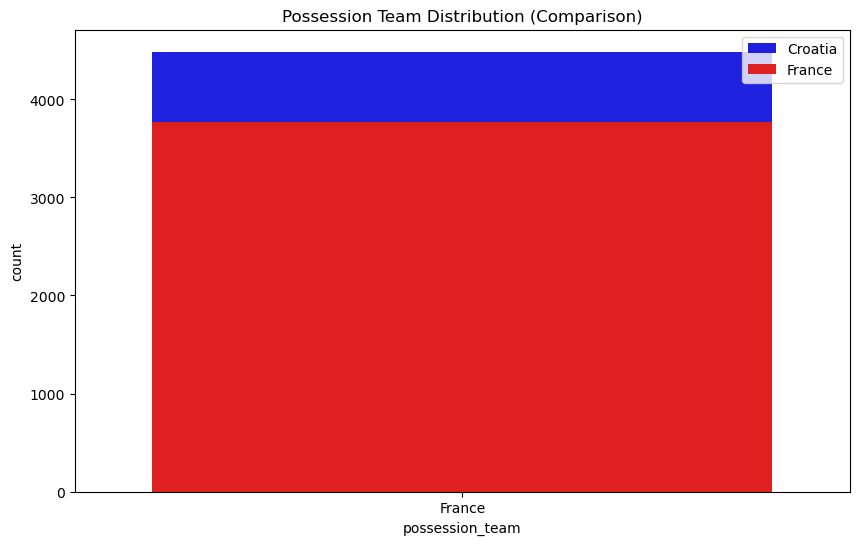

In [21]:
# Possession Team Distribution
plt.figure(figsize=(10, 6))

# Plot Croatia data
sns.countplot(x='possession_team', data=croatia_data, color='blue', label='Croatia')

# Plot France data
sns.countplot(x='possession_team', data=france_data, color='red', label='France')

plt.title('Possession Team Distribution (Comparison)')
plt.legend()
plt.show()

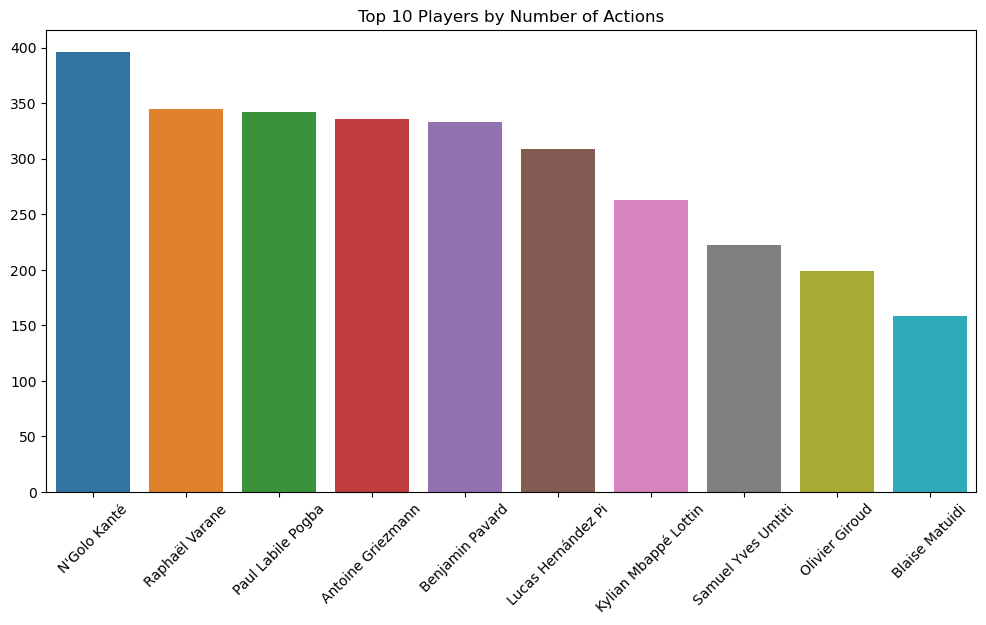

In [24]:
# Player-Wise Analysis  France

# Replace 'player' with the actual column name from your dataset
player_counts = france_data['player'].value_counts()
top_players = player_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top 10 Players by Number of Actions')
plt.xticks(rotation=45)
plt.show()

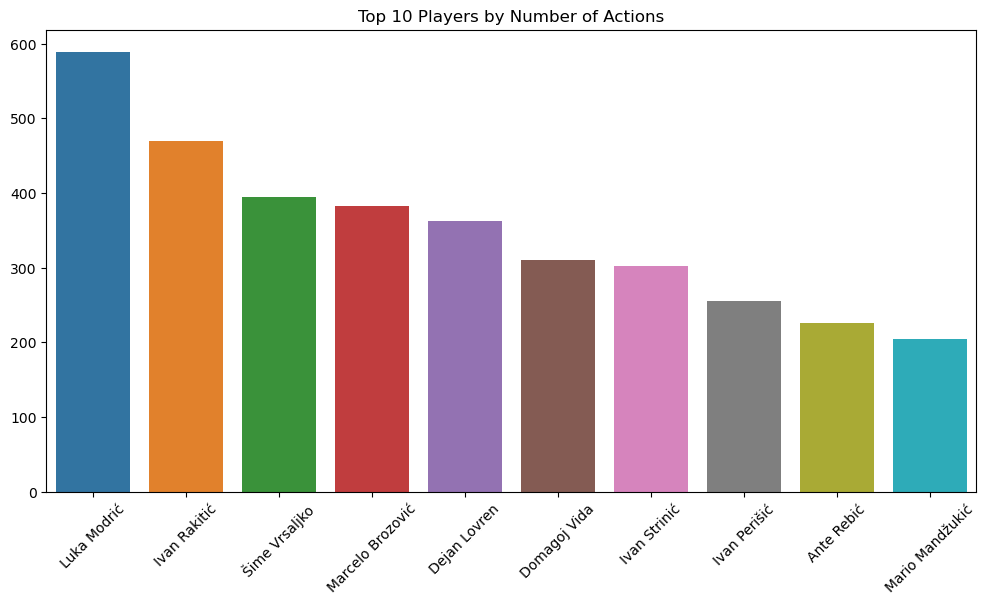

In [25]:
# Player-Wise Analysis Croatia

# Replace 'player' with the actual column name from your dataset
player_counts = croatia_data['player'].value_counts()
top_players = player_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top 10 Players by Number of Actions')
plt.xticks(rotation=45)
plt.show()

In [26]:
# For Croatia data
croatia_null_columns = croatia_data.isnull().sum()
print("Null values in Croatia Data:")
print(croatia_null_columns[croatia_null_columns > 0])

# For France data
france_null_columns = france_data.isnull().sum()
print("\nNull values in France Data:")
print(france_null_columns[france_null_columns > 0])

Null values in Croatia Data:
angle         773
length        773
height       4487
recipient    1001
duration      359
body_part     832
end_X         649
end_Y         649
dtype: int64

Null values in France Data:
angle         731
length        731
height       3770
recipient     887
duration      388
body_part     802
end_X         649
end_Y         649
dtype: int64


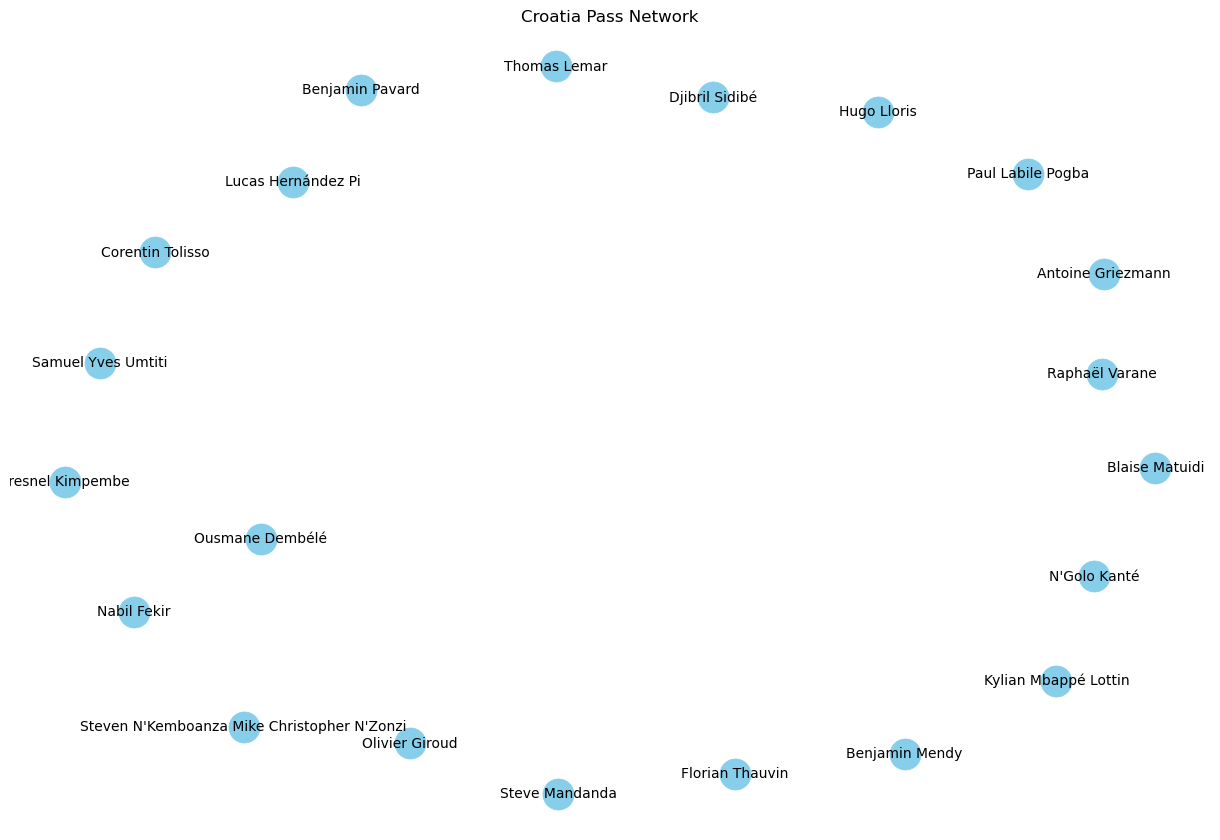

In [35]:
# Analyze Pass Network of Player Interaction
import networkx as nx

pass_data = france_data[['player', 'recipient', 'start_X', 'start_Y', 'end_X', 'end_Y', 'result', 'period']]

# Create a directed graph for pass network
G = nx.DiGraph()

# Add nodes for players
G.add_nodes_from(france_data['player'].unique())

# Iterate through passes and add edges to the graph
for _, row in pass_data.iterrows():
    if row['result'] == 'Successful':
        G.add_edge(row['player'], row['recipient'])

# Visualize the pass network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # You can use different layouts based on your preference
nx.draw(G, pos, with_labels=True, font_size=10, font_color='black', node_size=500, node_color='skyblue', edge_color='gray', linewidths=0.5, arrowsize=10)

plt.title('Croatia Pass Network')
plt.show()


## Counter Attacking Analysis

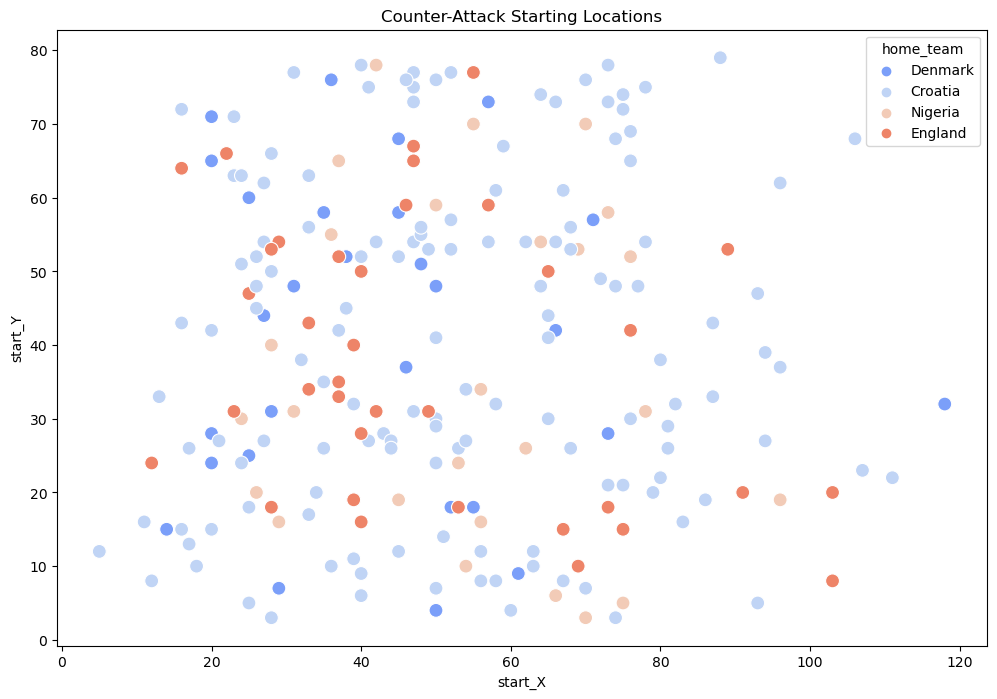

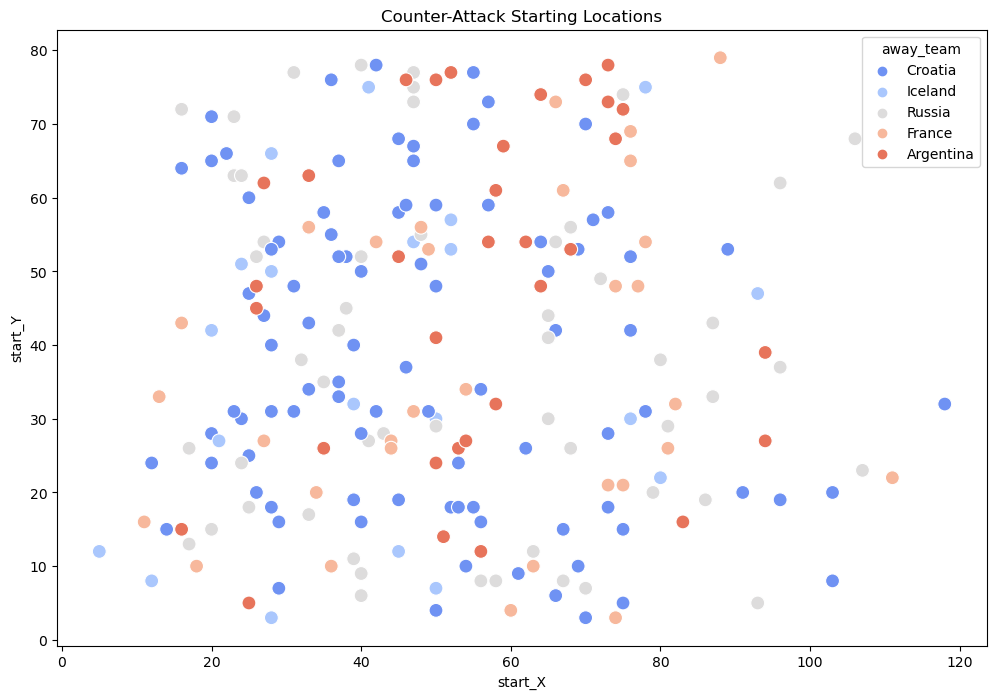

In [45]:
# Counter-Attacking Analysis

counter_attack_data = croatia_data[['home_team', 'away_team', 'result', 'start_X', 'start_Y', 'end_X', 'end_Y', 'duration', 'type']]

counter_attacks = counter_attack_data[(counter_attack_data['type'] == 'Recovery') & (counter_attack_data['result'] != 'Incomplete')]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_X', y='start_Y', data=counter_attacks, hue='home_team', palette='coolwarm', s=100)
plt.title('Counter-Attack Starting Locations Home Team')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_X', y='start_Y', data=counter_attacks, hue='away_team', palette='coolwarm', s=100)
plt.title('Counter-Attack Starting Locations Away Team')
plt.show()

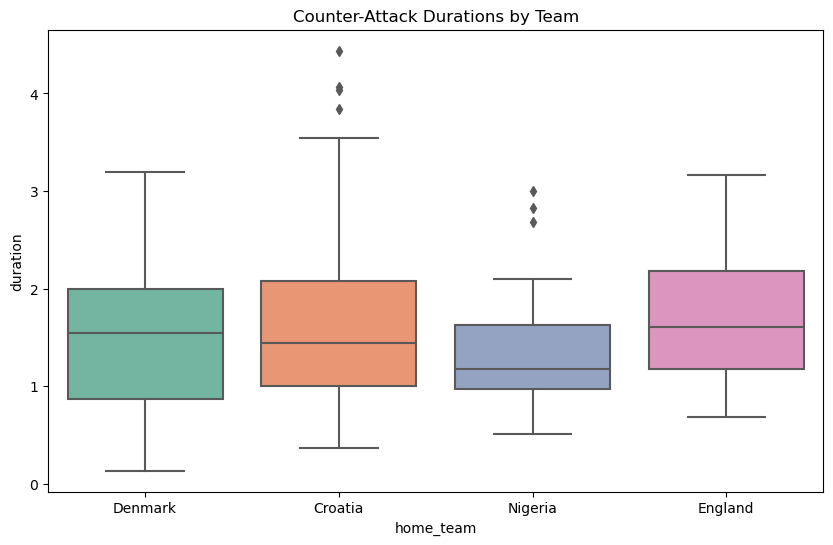

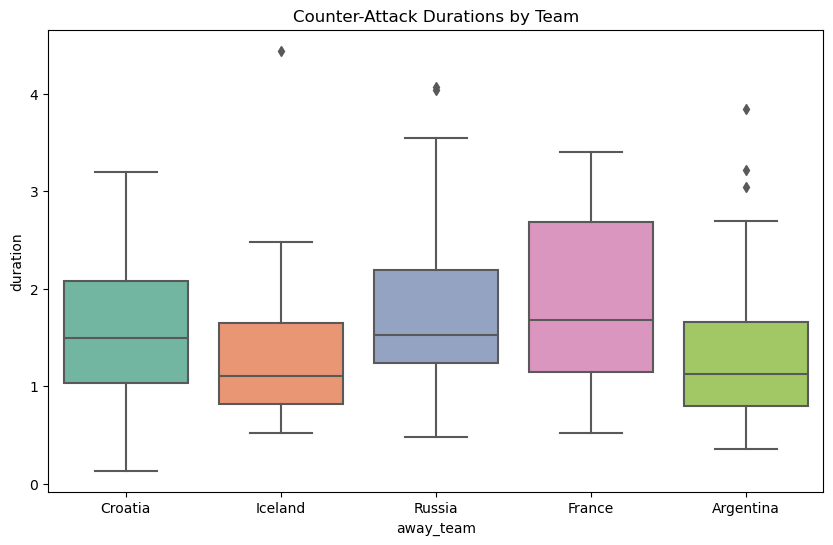

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_team', y='duration', data=counter_attacks, palette='Set2')
plt.title('Counter-Attack Durations by Team')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='away_team', y='duration', data=counter_attacks, palette='Set2')
plt.title('Counter-Attack Durations by Team')
plt.show()

In [50]:
avg_duration = counter_attacks.groupby('home_team')['duration'].mean()
frequency = counter_attacks['home_team'].value_counts()
success_rate = counter_attacks.groupby('home_team')['result'].value_counts(normalize=True).unstack().fillna(0)['None']

print("Average Duration of Counter-Attacks:")
print(avg_duration)

print("\nCounter-Attack Frequency:")
print(frequency)

print("\nCounter-Attack Success Rate:")
print(success_rate)

Average Duration of Counter-Attacks:
home_team
Croatia    1.634596
Denmark    1.580100
England    1.766528
Nigeria    1.400692
Name: duration, dtype: float64

Counter-Attack Frequency:
Croatia    141
England     36
Denmark     30
Nigeria     26
Name: home_team, dtype: int64

Counter-Attack Success Rate:
home_team
Croatia    0.971631
Denmark    0.966667
England    0.972222
Nigeria    0.961538
Name: None, dtype: float64


## Game Flow & Tactics

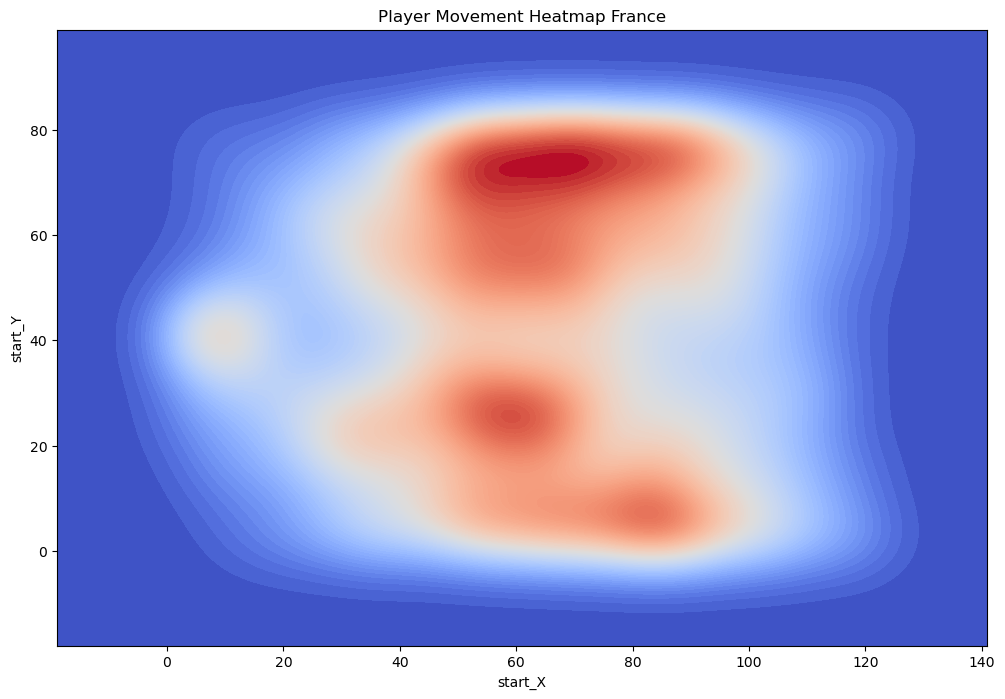

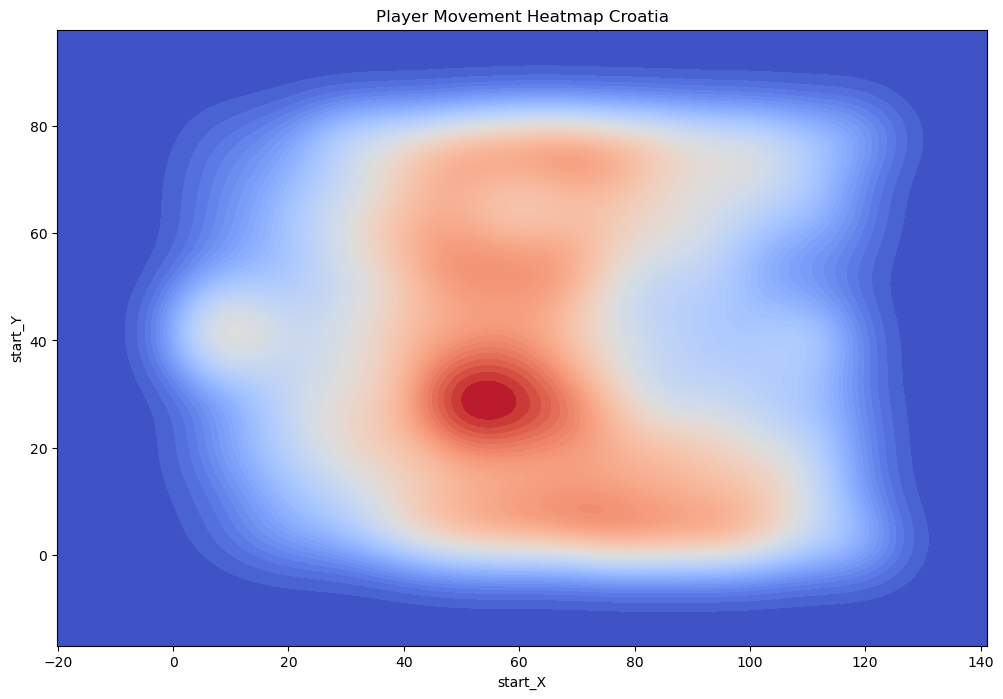

In [54]:
game_flow_data = france_data[['home_team', 'result', 'type', 'start_X', 'start_Y', 'end_X', 'end_Y', 'period', 'duration']]

# Create a heatmap of player movement
plt.figure(figsize=(12, 8))
sns.kdeplot(x='start_X', y='start_Y', data=game_flow_data, cmap='coolwarm', fill=True, thresh=0, levels=100)
plt.title('Player Movement Heatmap France')
plt.show()

game_flow_data = croatia_data[['home_team', 'result', 'type', 'start_X', 'start_Y', 'end_X', 'end_Y', 'period', 'duration']]

# Create a heatmap of player movement
plt.figure(figsize=(12, 8))
sns.kdeplot(x='start_X', y='start_Y', data=game_flow_data, cmap='coolwarm', fill=True, thresh=0, levels=100)
plt.title('Player Movement Heatmap Croatia')
plt.show()


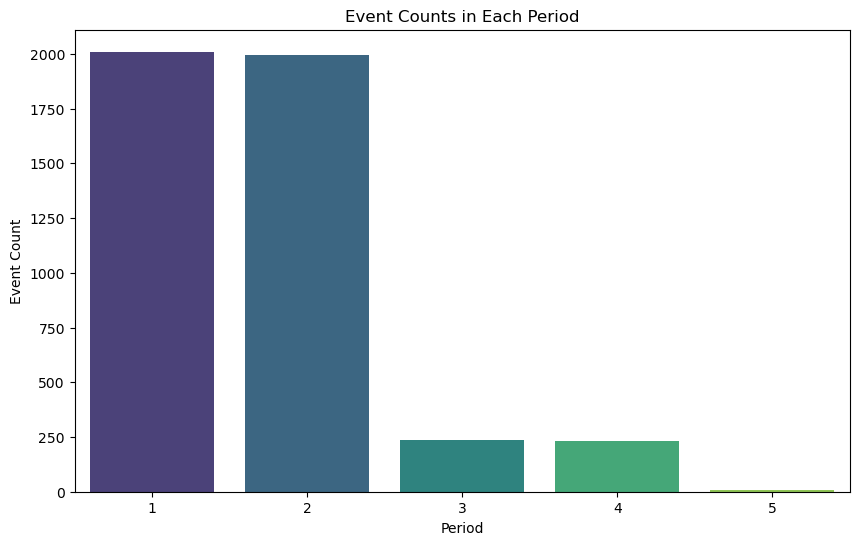

In [55]:
# Count the number of events in each period
period_counts = game_flow_data['period'].value_counts()

# Plot period-wise event counts
plt.figure(figsize=(10, 6))
sns.barplot(x=period_counts.index, y=period_counts.values, palette='viridis')
plt.title('Event Counts in Each Period')
plt.xlabel('Period')
plt.ylabel('Event Count')
plt.show()

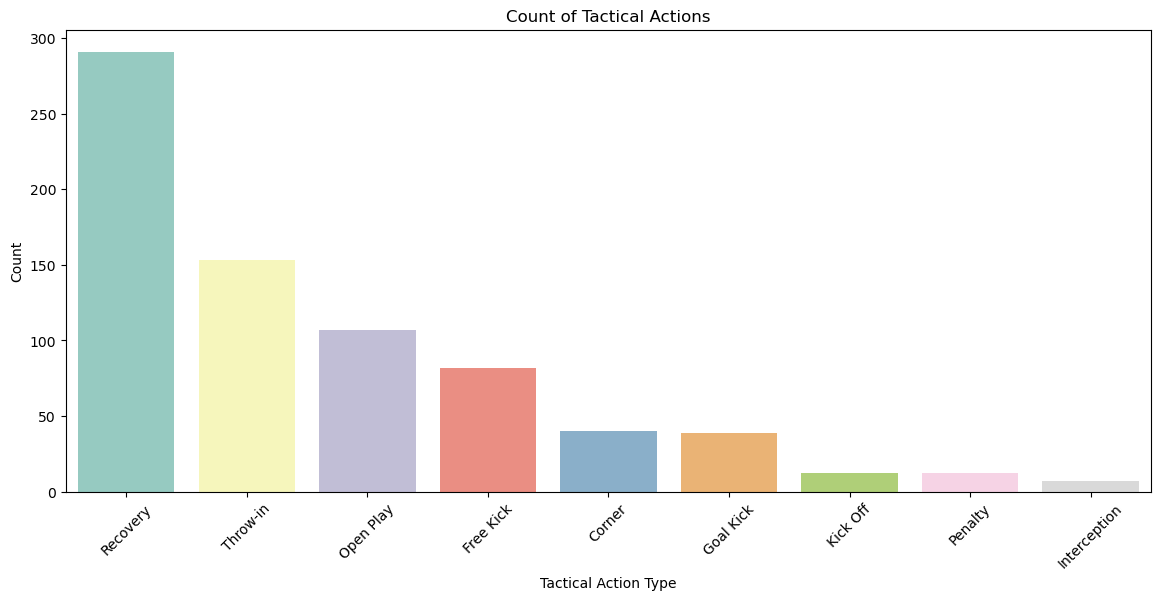

In [60]:
# Count the occurrences of each tactical action type
game_flow_data_filtered = game_flow_data[game_flow_data['type'] != 'None']
tactical_counts = game_flow_data_filtered['type'].value_counts()

# Plot the count of tactical actions
plt.figure(figsize=(14, 6))
sns.barplot(x=tactical_counts.index, y=tactical_counts.values, palette='Set3')
plt.title('Count of Tactical Actions')
plt.xlabel('Tactical Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Team Performance Analysis

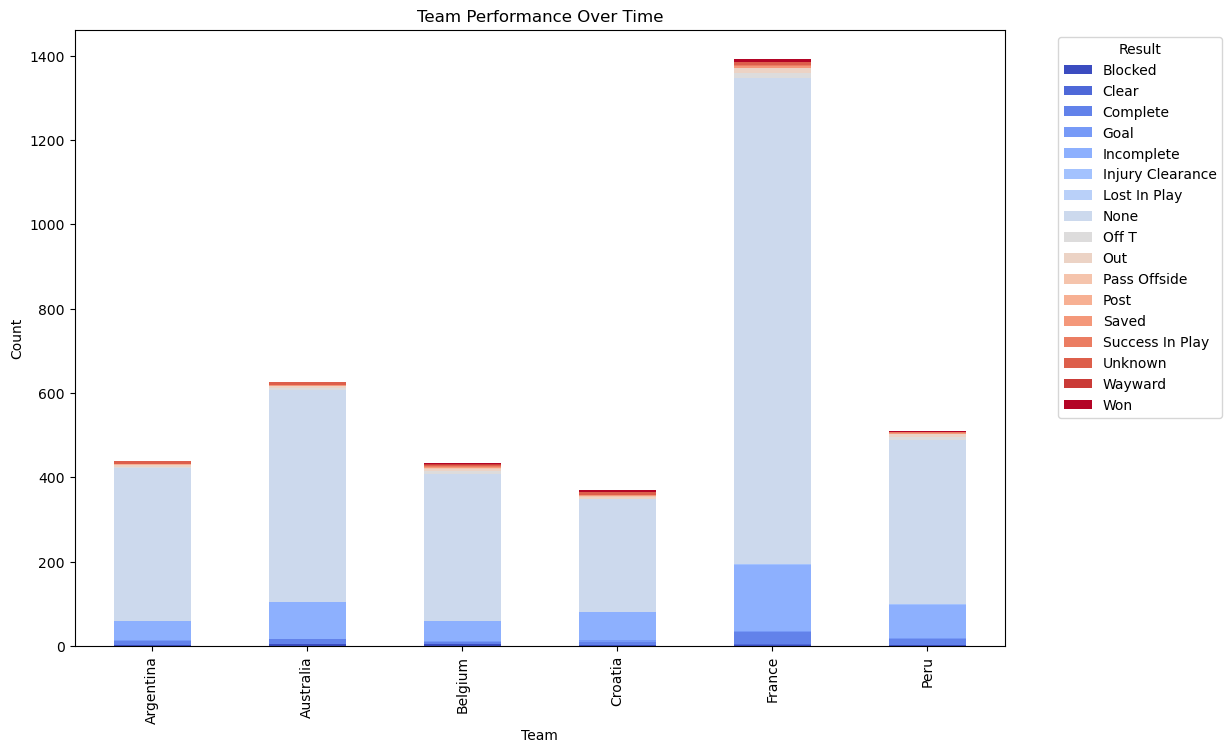

In [61]:
team_performance_data = france_data[['home_team', 'result', 'type', 'start_X', 'start_Y', 'end_X', 'end_Y', 'period', 'duration']]

# Count the number of wins, draws, and losses for each team
team_results = team_performance_data.groupby(['home_team', 'result']).size().unstack().fillna(0)

# Plot team performance over time
team_results.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Team Performance Over Time')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(title='Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
